In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [14]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [15]:
print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [17]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

skew is 1.8828757597682129


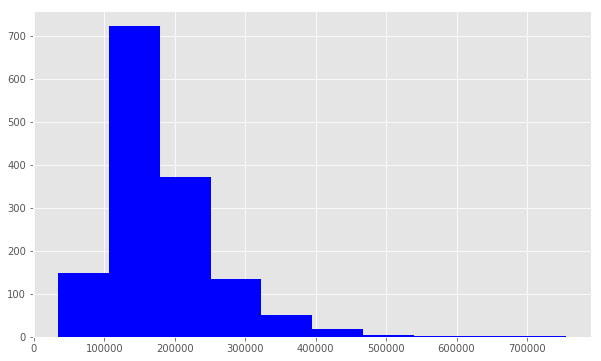

In [18]:
print('skew is', train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()


 Skew is 0.12133506220520406


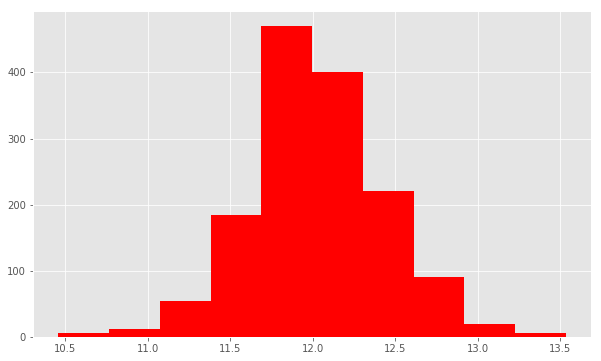

In [23]:
target = np.log(train.SalePrice)
print("\n Skew is", target.skew())
plt.hist(target,color='r')
plt.show()

In [26]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

In [33]:
print(corr['SalePrice'].sort_values(ascending=False)[:])

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

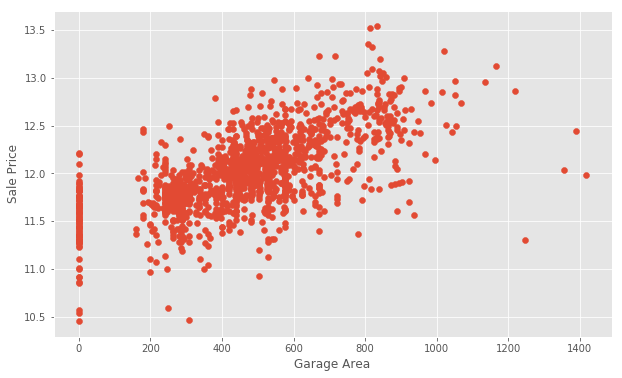

In [34]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [40]:
train = train[train['GarageArea'] < 1200]

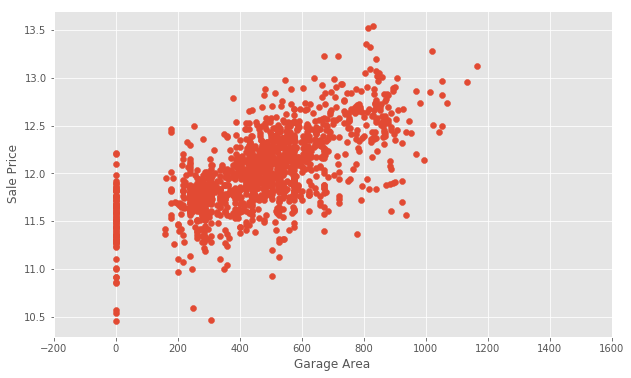

In [41]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

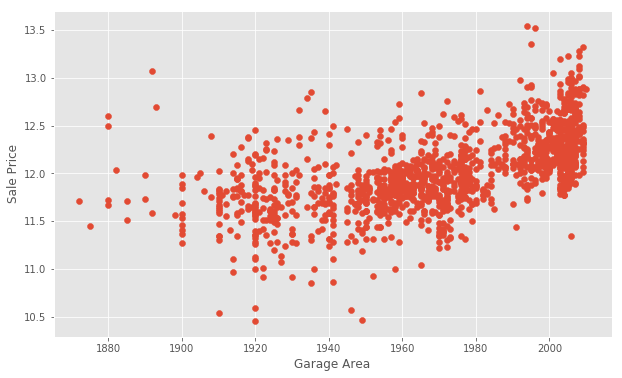

In [35]:
plt.scatter(x=train['YearBuilt'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [43]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns =['Null count']
nulls.index.name = 'Feature'
print(nulls)

              Null count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [44]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Fa  MnPrv   
freq    

In [46]:
print('Original: \n')
print(train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



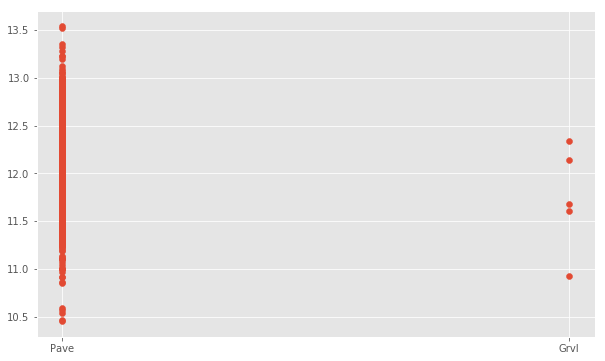

In [48]:
plt.scatter(x=train['Street'], y=np.log(train.SalePrice))
plt.show()

In [49]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(train.Street, drop_first=True)

In [ ]:
print('Encoded: \n')
print(train.enc_street.value_counts())

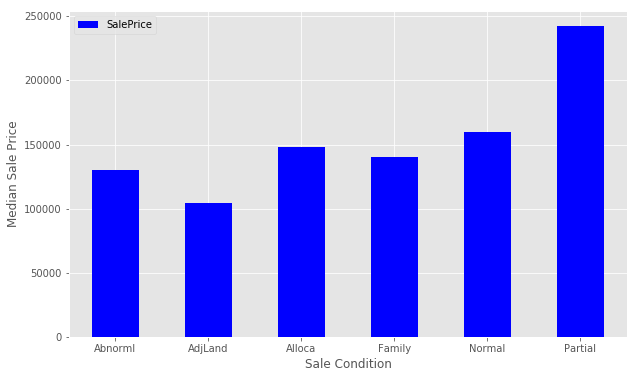

In [50]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [52]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [55]:
print(sum(data.isnull().sum() != 0))

0


In [56]:
y = np.log(train.SalePrice)
x = data.drop(['SalePrice','Id'], axis=1)

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, random_state=42,test_size=.33)

In [66]:
lr = linear_model.LinearRegression()
model = lr.fit(xtrain, ytrain)

In [67]:
print('R^2 is: \n', model.score(xtest,ytest))

R^2 is: 
 0.8859523045334823


In [69]:
predictions =model.predict(xtest)

In [70]:
print('RMSE is:', mean_squared_error(ytest,predictions))

RMSE is: 0.01820827705012544


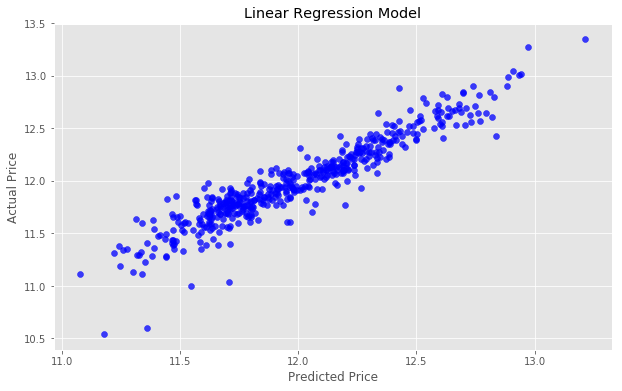

In [71]:
actual_values = ytest
plt.scatter(predictions, actual_values, alpha=.75,
           color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [72]:
submission = pd.DataFrame()
submission['Id']= test.Id


In [74]:
feats=test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()


In [75]:
predictions= model.predict(feats)

final_predictions = np.exp(predictions)

In [76]:
print("Original predictions are:\n", predictions[:10],'\n')
print('Final predictions are: \n', final_predictions[:10])


Original predictions are:
 [11.76719377 11.70360578 12.07641363 12.20856947 12.11758175 12.06239446
 12.15734273 12.02551253 12.17294188 11.65654868] 

Final predictions are: 
 [128951.77415622 121007.25452456 175678.98050216 200499.98966514
 183062.28922701 173233.28948003 190487.66653086 166960.49920976
 193482.4093085  115444.9041755 ]


In [77]:
submission['SalePrice']=final_predictions
print(submission.head())

     Id      SalePrice
0  1461  128951.774156
1  1462  121007.254525
2  1463  175678.980502
3  1464  200499.989665
4  1465  183062.289227


In [78]:
submission.to_csv('submission.csv', index=False)
